# Defunciones por causa

## Instituto de Estadística de la Comunidad de Madrid.

### Datos de 1999 a 2014

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 15,10

In [7]:
defunciones_df = pd.read_csv('Datasets/defunciones.csv', sep=';', decimal=',')
causas = defunciones_df['Serie'].copy()
columns = defunciones_df.columns
defunciones_df = defunciones_df.drop('Serie', 1)
defunciones_df = defunciones_df.drop('Unidad', 1)
defunciones_df = defunciones_df.drop('Fuente', 1)
defunciones_df = defunciones_df.transpose()

In [8]:
c = []
c.append('otras_perc')
c.append('raras')
c.append('osteomuscular')
c.append('piel')
c.append('sistema_digestivo')

c.append('tumores_perc')
c.append('sistema_nervioso')
c.append('infecciosas')
c.append('sistema_respiratorio')
c.append('causas_externas')

c.append('periodo_perinatal')
c.append('anomalias_cromosomicas')
c.append('sistema_respiratorio_perc')
c.append('sistema_circulatorio')
c.append('sistema_sanguineo')

c.append('embarazo_parto')
c.append('sistema_circulatorio_perc')
c.append('sistema_genitourinario')
c.append('endocrinas_nutricionales')
c.append('tumores')

c.append('trastornos_mentales')

defunciones_df.columns = c

In [9]:
for i in defunciones_df.columns:
    defunciones_df[i] = defunciones_df[i].apply(lambda x: x.replace('.',''))
    defunciones_df[i] = defunciones_df[i].apply(lambda x: x.replace(',','.')).astype(float)


In [10]:
defunciones_df.head()

,otras_perc,raras,osteomuscular,piel,sistema_digestivo,tumores_perc,sistema_nervioso,infecciosas,sistema_respiratorio,causas_externas,...,anomalias_cromosomicas,sistema_respiratorio_perc,sistema_circulatorio,sistema_sanguineo,embarazo_parto,sistema_circulatorio_perc,sistema_genitourinario,endocrinas_nutricionales,tumores,trastornos_mentales
1999,27.11,1264.0,277.0,78.0,2165.0,28.71,1109.0,813.0,5048.0,1341.0,...,114.0,13.26,11774.0,111.0,1.0,30.92,896.0,870.0,10930.0,1210.0
2000,27.40,1124.0,258.0,97.0,2190.0,29.62,1147.0,756.0,4656.0,1501.0,...,123.0,12.31,11604.0,117.0,2.0,30.67,972.0,830.0,11209.0,1144.0
2001,27.47,1340.0,277.0,101.0,2131.0,29.42,1199.0,765.0,4808.0,1425.0,...,137.0,12.48,11801.0,129.0,0.0,30.63,1016.0,847.0,11336.0,1113.0
2002,27.37,1392.0,252.0,114.0,2153.0,28.60,1248.0,772.0,5191.0,1435.0,...,128.0,13.22,12097.0,137.0,2.0,30.81,1042.0,901.0,11229.0,1067.0
2003,27.94,1483.0,277.0,99.0,2296.0,28.17,1484.0,859.0,5906.0,1467.0,...,132.0,14.26,12275.0,119.0,2.0,29.63,1106.0,958.0,11671.0,1168.0


In [11]:
reduced_df = defunciones_df.drop(['otras_perc', 'tumores_perc', 'sistema_respiratorio_perc', 'sistema_circulatorio_perc'], axis=1)

In [12]:
reduced_df.loc[:,reduced_df.mean() >1000]

,raras,sistema_digestivo,sistema_nervioso,sistema_respiratorio,causas_externas,sistema_circulatorio,sistema_genitourinario,tumores,trastornos_mentales
1999,1264.0,2165.0,1109.0,5048.0,1341.0,11774.0,896.0,10930.0,1210.0
2000,1124.0,2190.0,1147.0,4656.0,1501.0,11604.0,972.0,11209.0,1144.0
2001,1340.0,2131.0,1199.0,4808.0,1425.0,11801.0,1016.0,11336.0,1113.0
2002,1392.0,2153.0,1248.0,5191.0,1435.0,12097.0,1042.0,11229.0,1067.0
2003,1483.0,2296.0,1484.0,5906.0,1467.0,12275.0,1106.0,11671.0,1168.0
2004,1459.0,2182.0,1498.0,5293.0,1707.0,12131.0,1015.0,11434.0,1049.0
2005,1580.0,2124.0,1588.0,6227.0,1469.0,11784.0,1067.0,11563.0,987.0
2006,1615.0,2181.0,1497.0,5591.0,1397.0,11445.0,1133.0,11761.0,933.0
2007,1798.0,2191.0,1617.0,6289.0,1392.0,11720.0,1230.0,11876.0,861.0
2008,1684.0,2001.0,1549.0,6652.0,1309.0,11729.0,1272.0,11979.0,798.0


In [13]:
big_df = reduced_df.loc[:,reduced_df.mean() >5000]
medium_df = reduced_df.loc[:,(reduced_df.mean() < 5000) &  (reduced_df.mean() > 1000)]
small_df = reduced_df.loc[:,(reduced_df.mean() < 1000) &  (reduced_df.mean() > 200)]
more_small_df = reduced_df.loc[:,reduced_df.mean() <200]

In [14]:
for i, causa in enumerate(causas):
    print(i, ' ', causa)


0   Porcentaje de defunciones de residentes por el resto de enfermedades
1   Defunciones por causa: XVIII Sï¿½ntomas, signos y hallazgos anormales clï¿½nicos y de laboratorio, no clasificados en otra causa
2   Defunciones por causa: XIII Enfermedades del sistema osteomuscular y del tejido conjuntivo
3   Defunciones por causa: XII Enfermedades de la piel y tejido subcutï¿½neo
4   Defunciones por causa: XI Enfermedades del sistema digestivo
5   Porcentaje de defunciones de residentes por tumores
6   Defunciones por causa: VI-VIII Enfermedades del sistema nervioso y ï¿½rganos de los sentidos
7   Defunciones por causa: I Enfermedades infecciosas y parasitarias
8   Defunciones por causa: X Enfermedades del sistema respiratorio
9   Defunciones por causa: XX Causas externas de mortalidad
10   Defunciones por causa: XVI Afecciones en el periodo perinatal
11   Defunciones por causa: XVII Malformaciones congï¿½nitas, deformidades y anomalï¿½as cromosï¿½micas
12   Porcentaje de defunciones de res

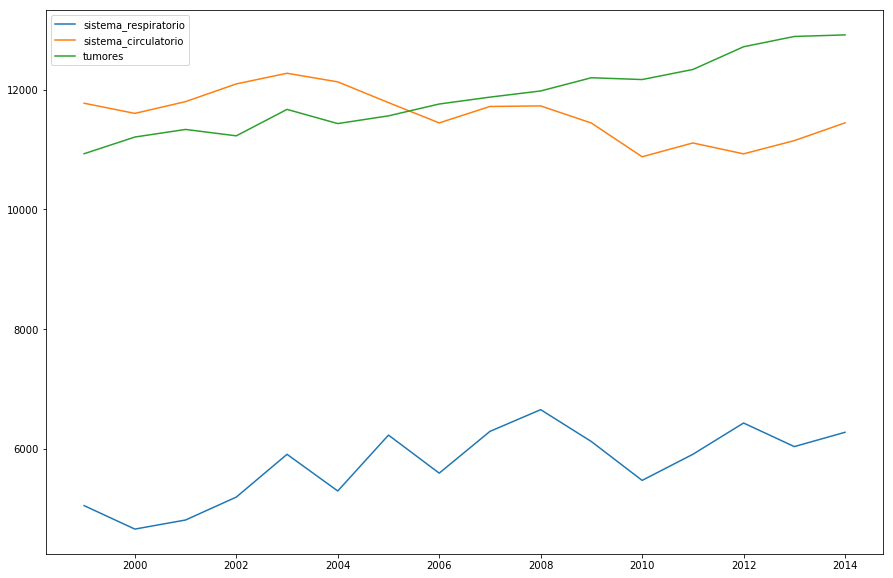

In [15]:
plt.plot(big_df)
plt.legend(big_df.columns)

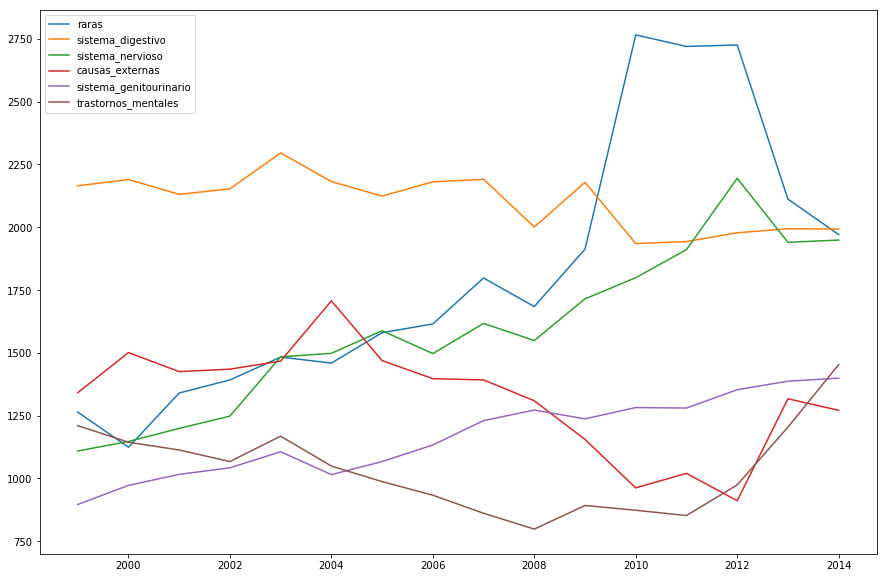

In [16]:
plt.plot(medium_df)
plt.legend(medium_df.columns)

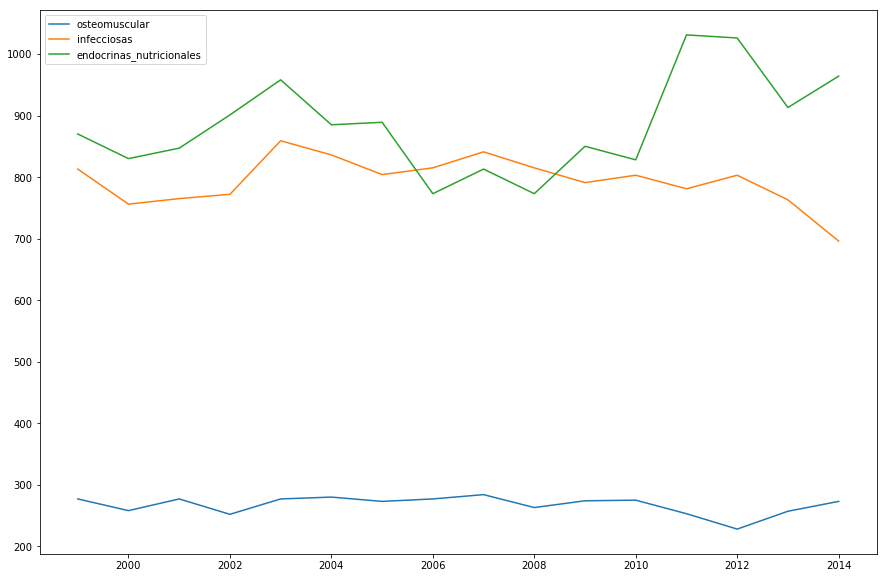

In [19]:
plt.plot(small_df)
plt.legend(small_df.columns)

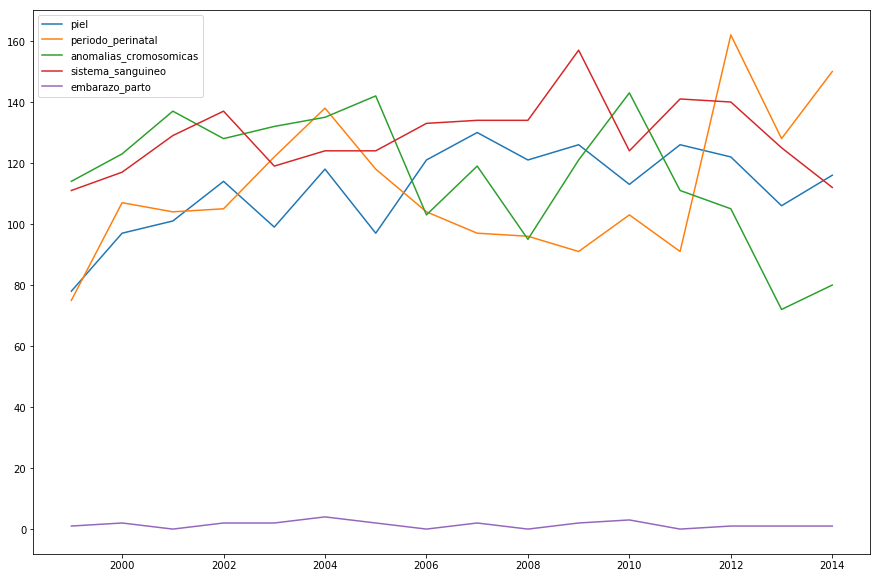

In [20]:
plt.plot(more_small_df)
plt.legend(more_small_df.columns)

0   Porcentaje de defunciones de residentes por el resto de enfermedades
1   Defunciones por causa: XVIII Sï¿½ntomas, signos y hallazgos anormales clï¿½nicos y de laboratorio, no clasificados en otra causa
2   Defunciones por causa: XIII Enfermedades del sistema osteomuscular y del tejido conjuntivo
3   Defunciones por causa: XII Enfermedades de la piel y tejido subcutï¿½neo
4   Defunciones por causa: XI Enfermedades del sistema digestivo
5   Porcentaje de defunciones de residentes por tumores
6   Defunciones por causa: VI-VIII Enfermedades del sistema nervioso y ï¿½rganos de los sentidos
7   Defunciones por causa: I Enfermedades infecciosas y parasitarias
8   Defunciones por causa: X Enfermedades del sistema respiratorio
9   Defunciones por causa: XX Causas externas de mortalidad
10   Defunciones por causa: XVI Afecciones en el periodo perinatal
11   Defunciones por causa: XVII Malformaciones congï¿½nitas, deformidades y anomalï¿½as cromosï¿½micas
12   Porcentaje de defunciones de res

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


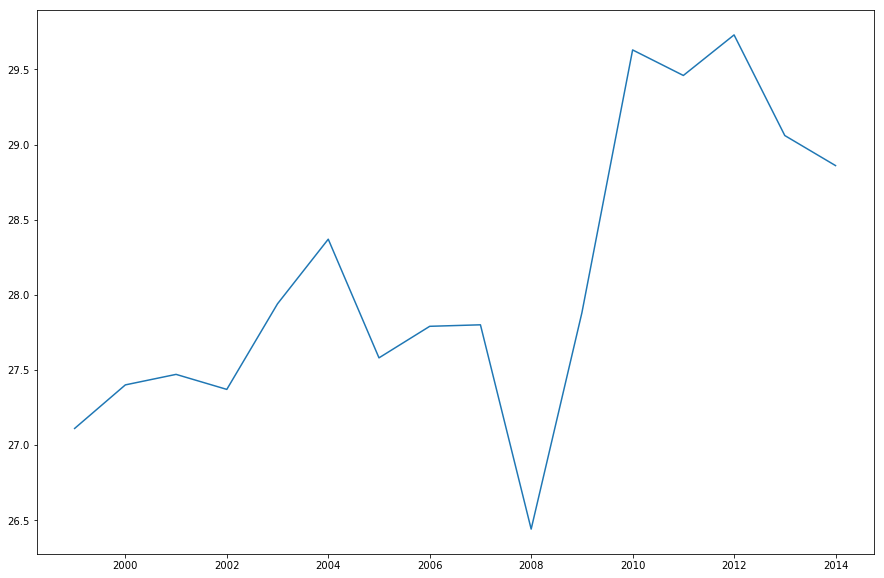

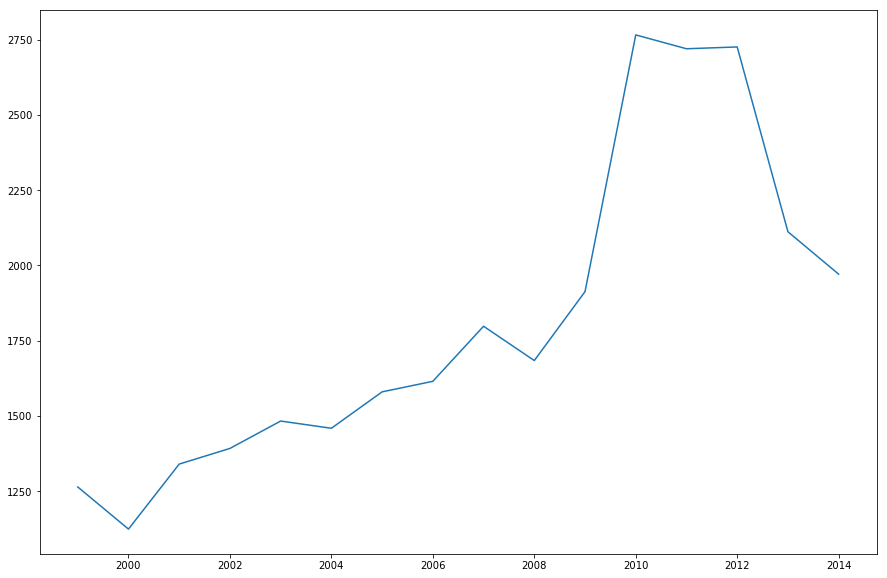

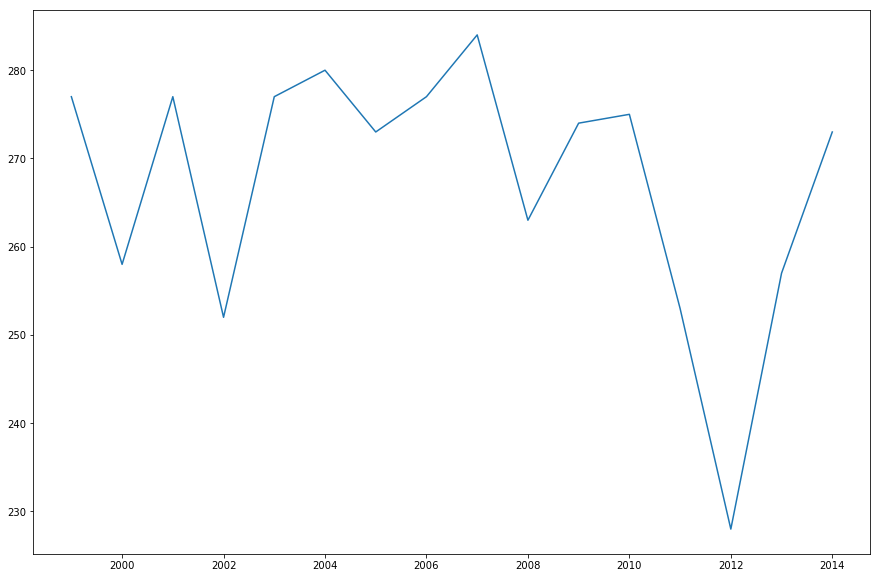

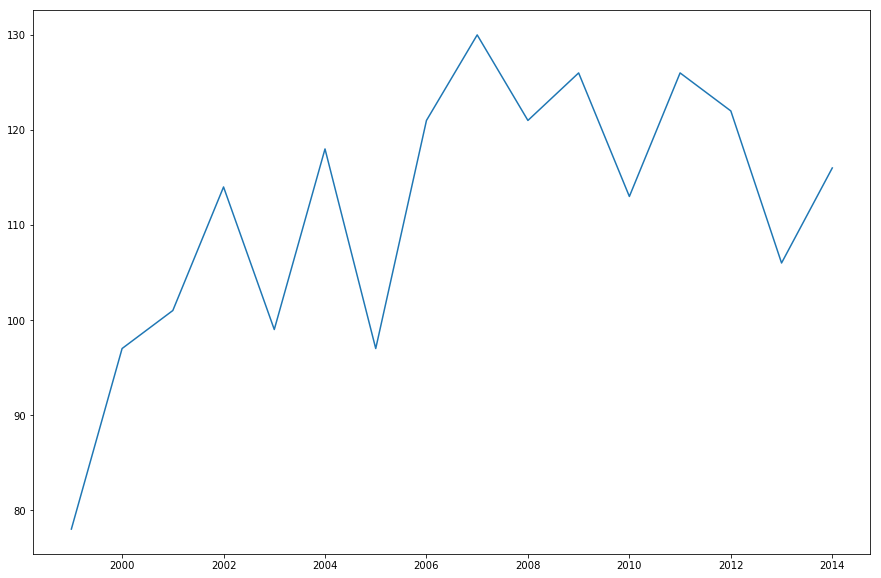

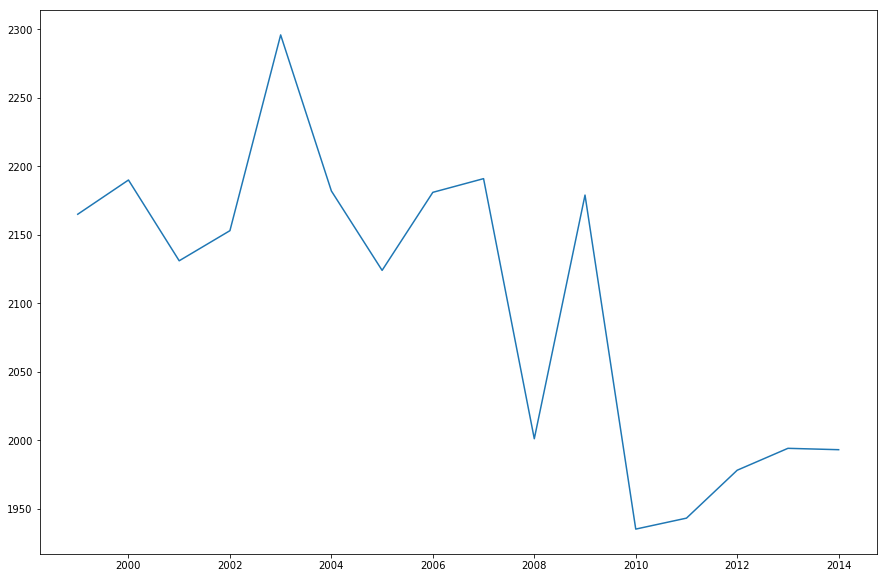

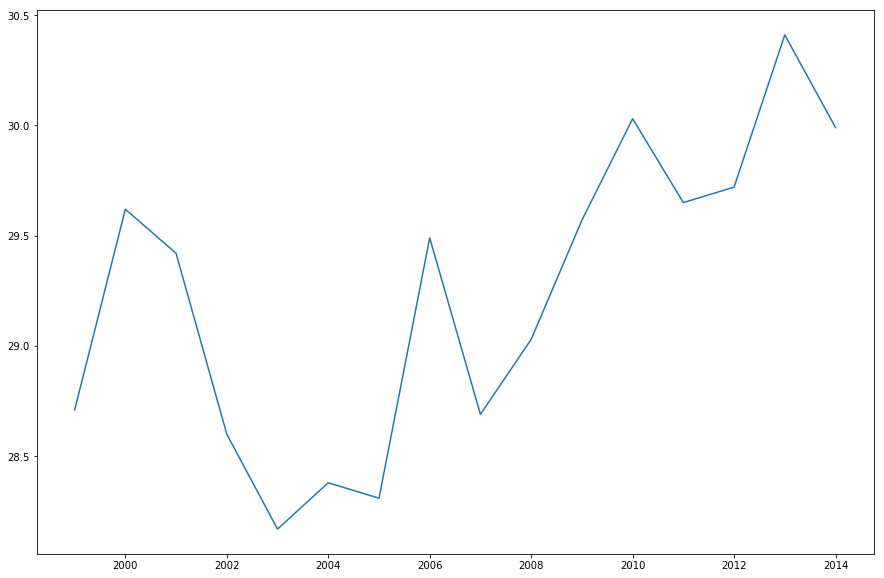

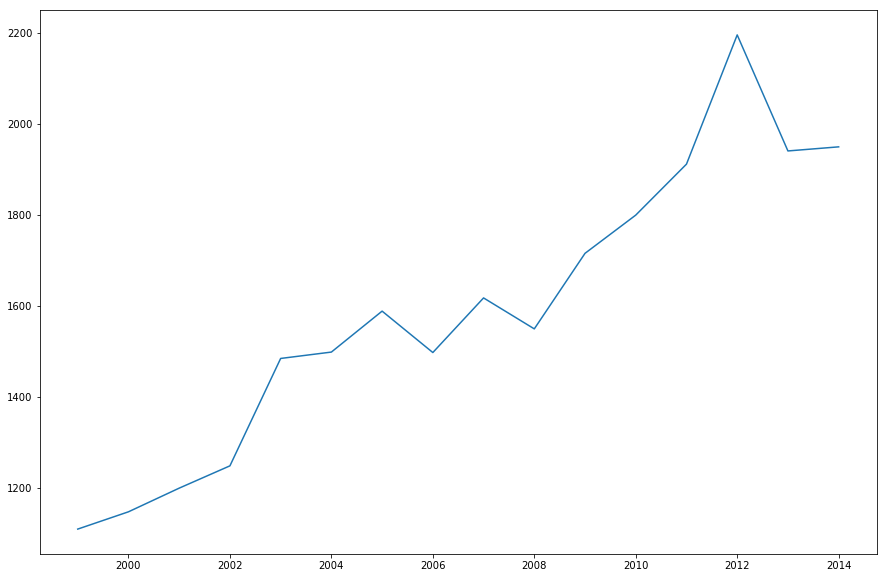

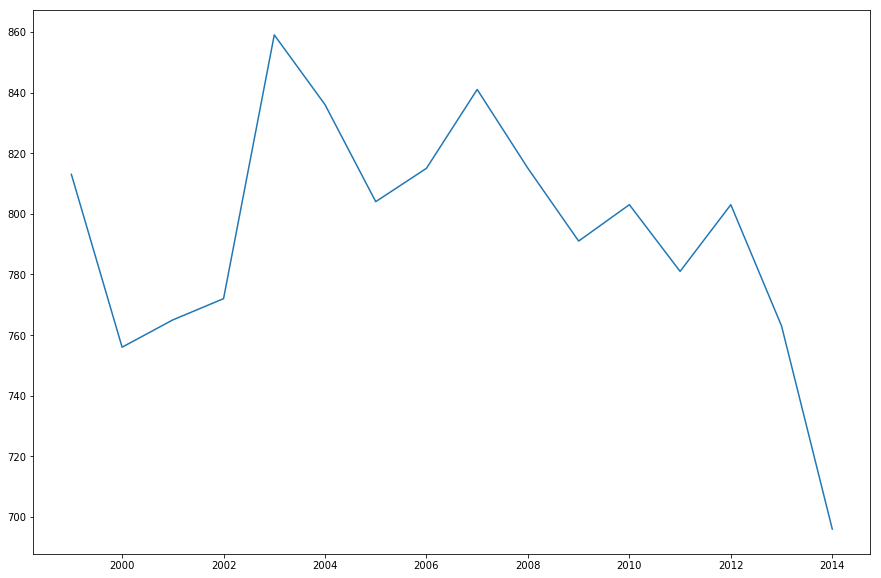

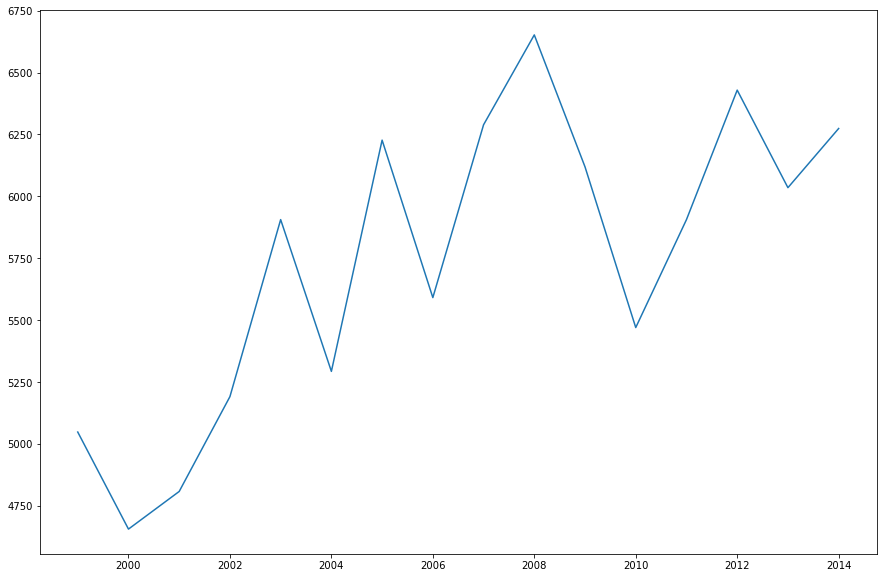

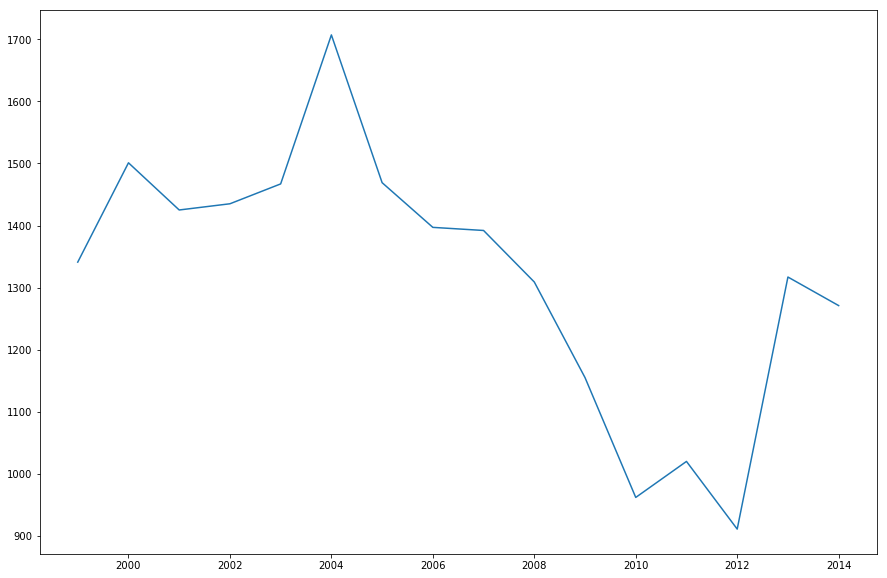

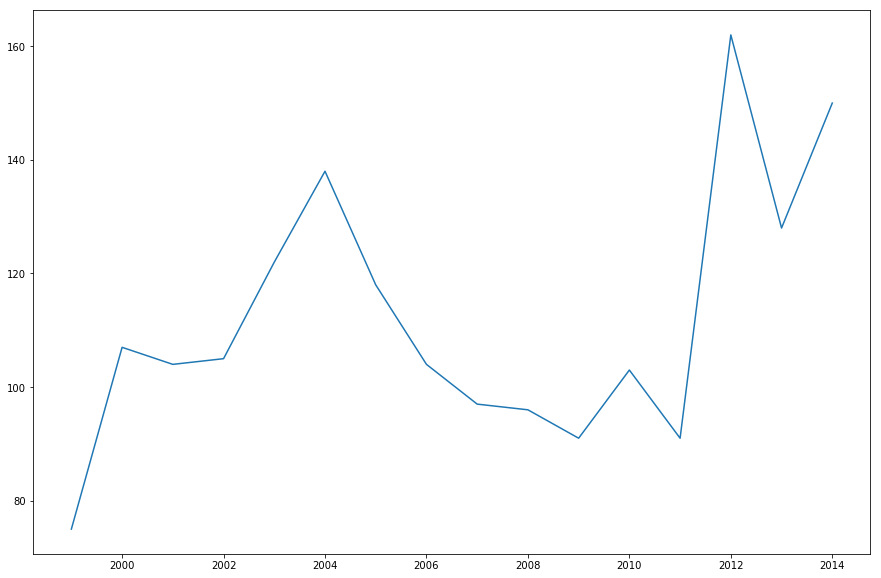

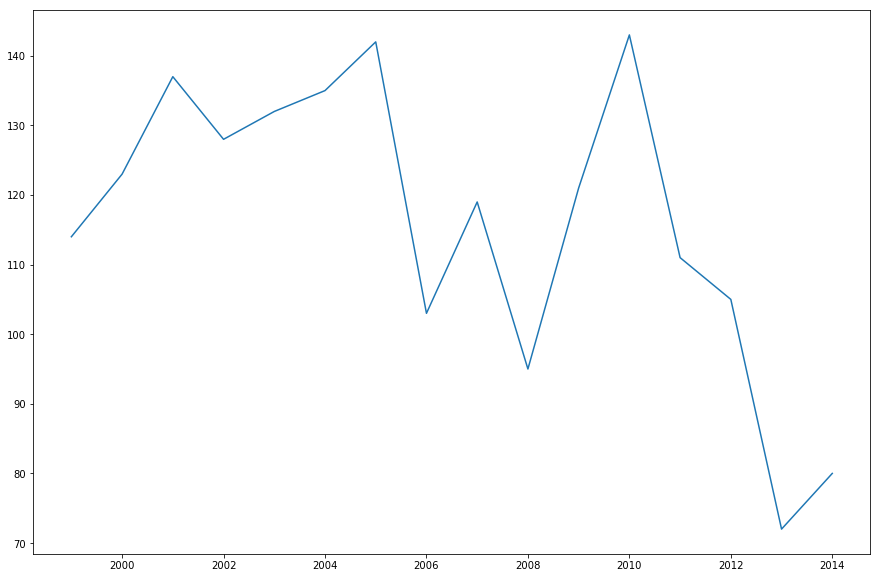

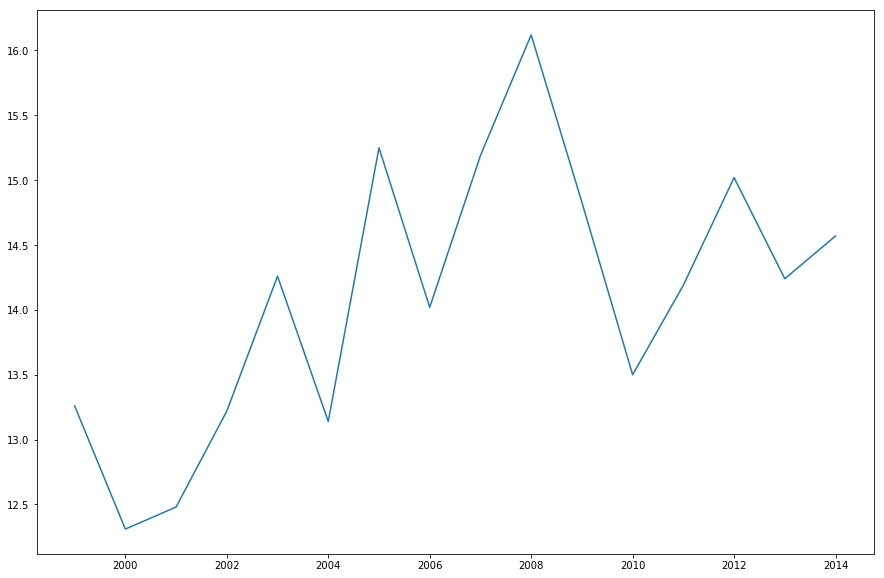

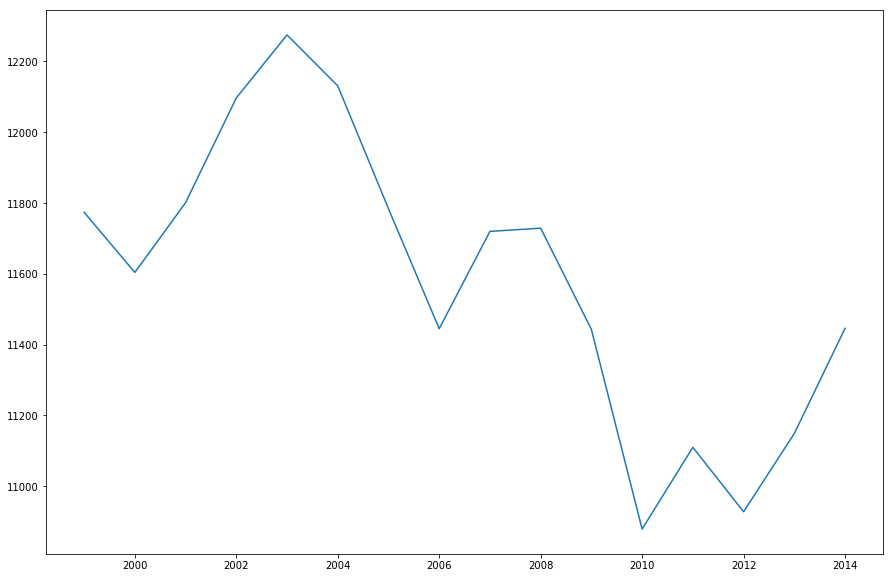

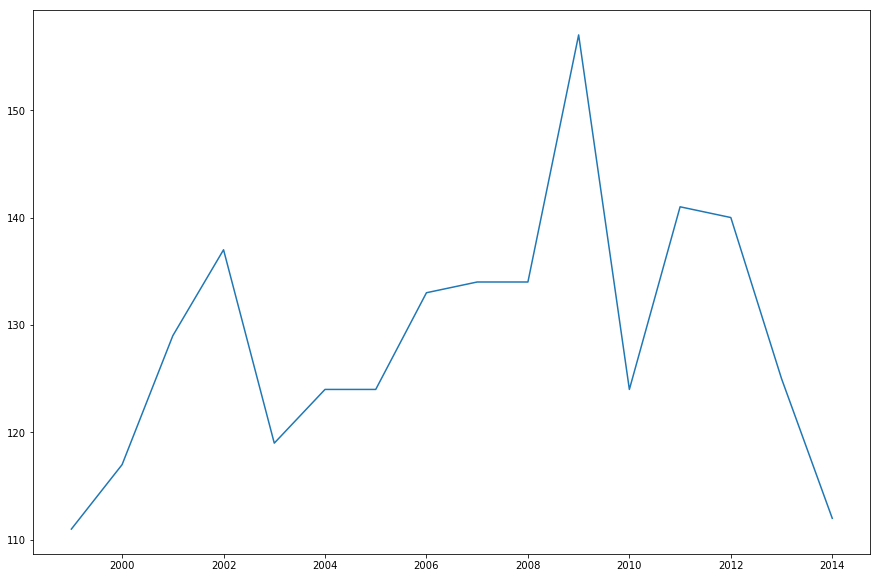

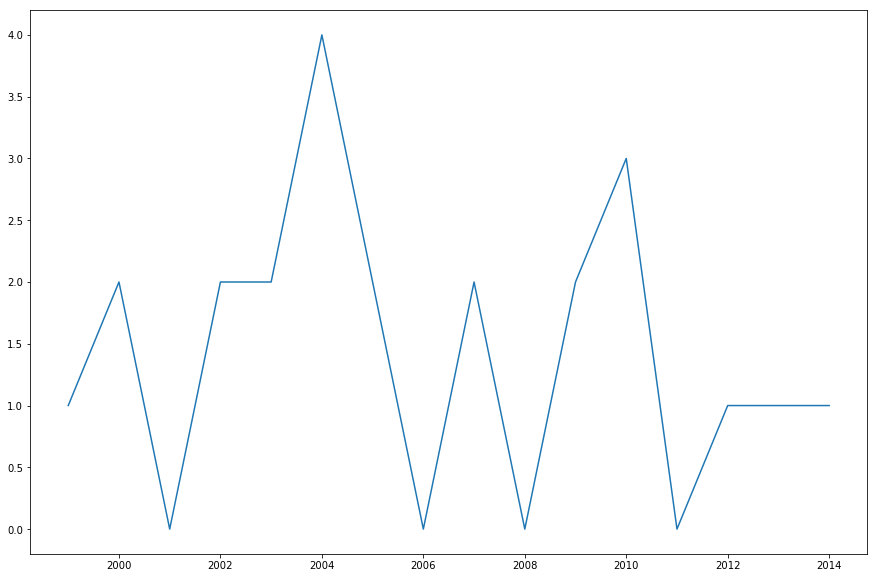

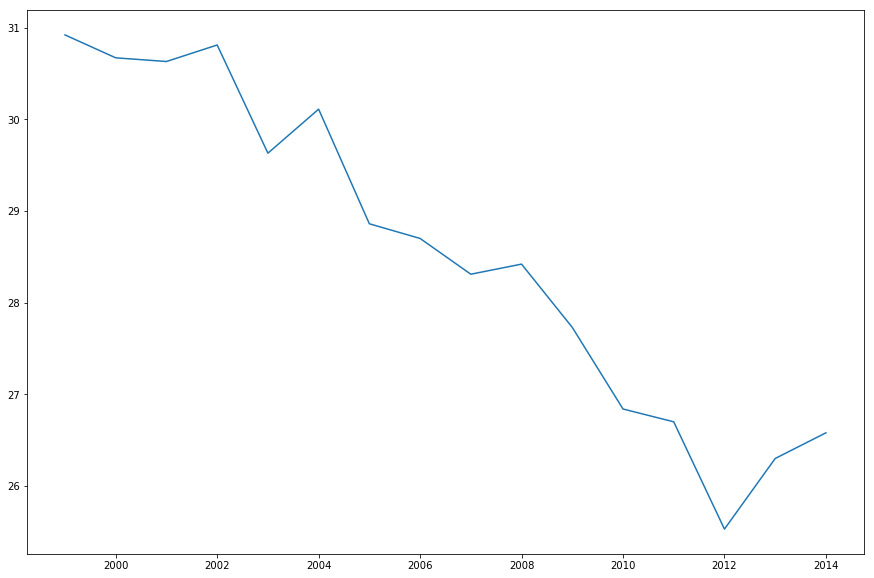

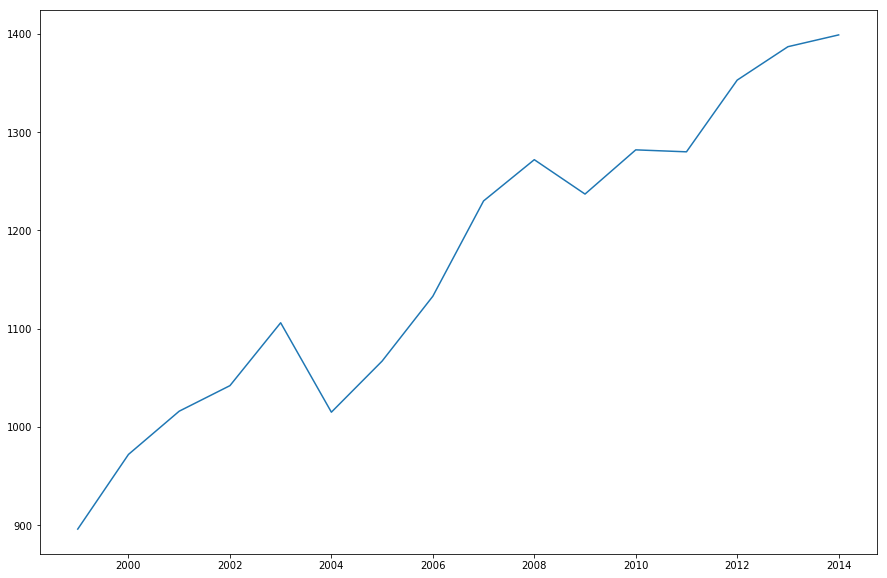

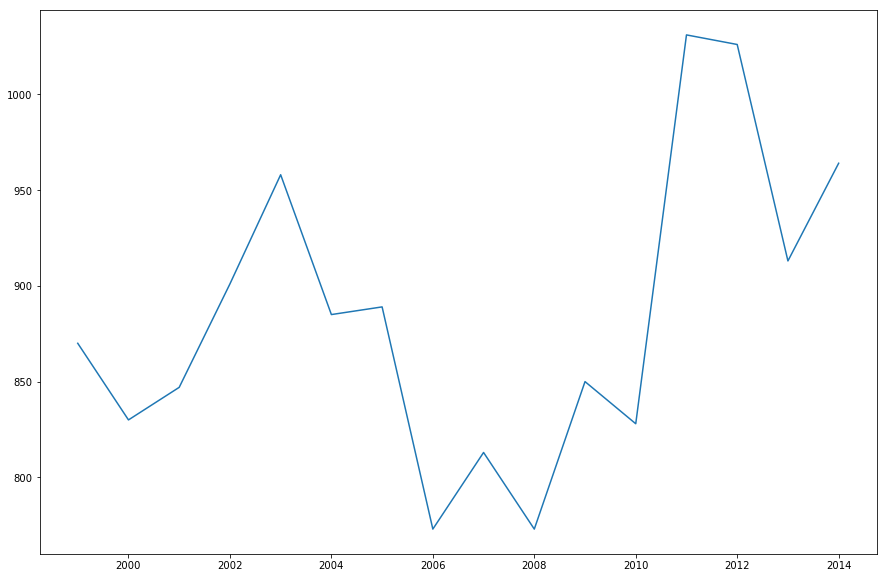

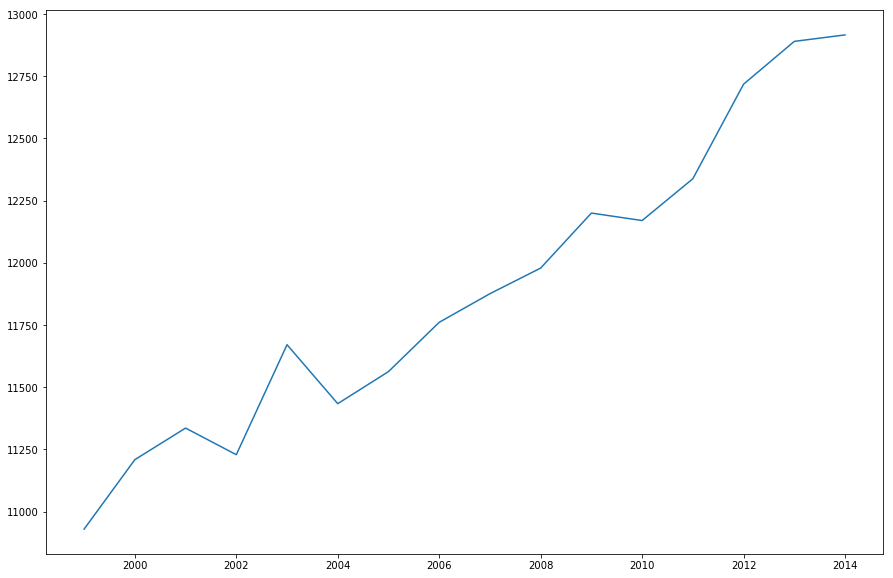

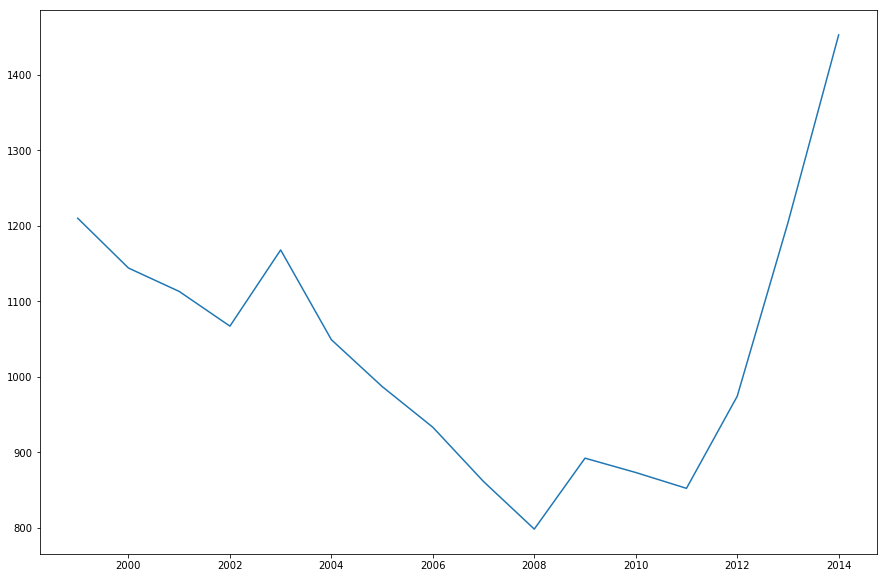

In [21]:
for idx, causa in enumerate(causas):
    print(idx, ' ',causa)
    f, axes = plt.subplots(1,1)
    plt.plot(defunciones_df.iloc[:,idx])

In [ ]:
defunciones_df.head()